<!-- # Problema: .

La **Kaggle Playground Series 2024** nos invita a participar en una competencia mensual con un enfoque práctico en aprendizaje automático. En esta edición, el objetivo es predecir la edad de los abalones a partir de medidas físicas.


**Métrica de Evaluación:** El error cuadrático medio logarítmico (RMSLE).

**Archivo de Envío:** Deberás predecir el valor de 'Rings' para cada fila en el conjunto de prueba. El archivo debe tener encabezado y seguir el formato proporcionado en el archivo `sample_submission.csv`.

**Descripción del Conjunto de Datos:** Los datos para esta competencia provienen de un modelo de aprendizaje profundo entrenado en el conjunto de datos de Abalone. Las distribuciones de características son similares, pero no idénticas, a las del conjunto original. Puedes usar el conjunto original para explorar diferencias y mejorar el rendimiento del modelo.

**Archivos:**
- `train.csv`: Conjunto de datos de entrenamiento con 'Rings' como objetivo.
- `test.csv`: Conjunto de datos de prueba para predecir 'Rings'.
- `sample_submission.csv`: Ejemplo de formato de envío.
-->

# Problem: Regression

The **Kaggle Playground Series 2024** invites us to participate in a monthly competition with a practical focus on machine learning. In this edition, the goal is to predict the age of abalones based on physical measurements.

**Evaluation Metric:** Root Mean Squared Logarithmic Error (RMSLE).

**Submission File:** You need to predict the 'Rings' value for each row in the test set. The file must have a header and follow the format provided in the `sample_submission.csv` file.

**Dataset Description:** The data for this competition comes from a deep learning model trained on the Abalone dataset. The feature distributions are similar, but not identical, to those in the original dataset. You can use the original dataset to explore differences and improve model performance.

**Files:**
- `train.csv`: Training dataset with 'Rings' as the target.
- `test.csv`: Test dataset for predicting 'Rings'.
- `sample_submission.csv`: Example of the submission format.




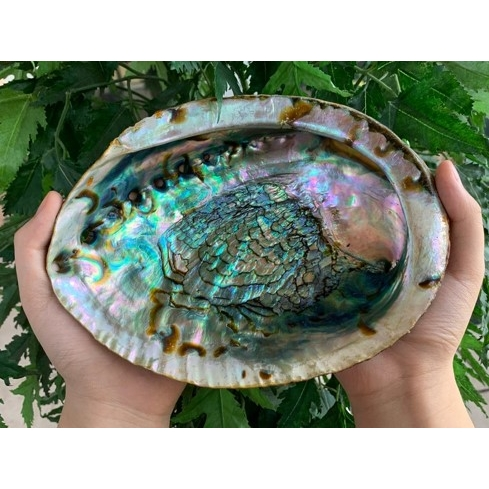

# Content

__1. Exploratory Visualization__  
__2. Data Cleaning__  
__3. Feature Engineering__  
__4. Modeling & Evaluation__  
__5. Ensemble Methods__  

In [ ]:
!pip install skimpy

In [ ]:
from skimpy import skim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer as Imputer

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR, LinearSVR
# from sklearn.kernel_ridge import KernelRidge
# from xgboost import XGBRegressor

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from tqdm.auto import tqdm
import optuna
from joblib import dump, load
from optuna.samplers import TPESampler


In [9]:
from sklearn.preprocessing import PowerTransformer

import sys
import os
sys.path.append('/kaggle/input/my-py-personal-utils-problemas-de-regresin')
from my import *

In [10]:
train = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [11]:
eda=my_EDA()
train.head()


Object my_EDA created



,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9




**Determinación de la edad del abulón:**

- **Conteo de Anillos:** Contar los anillos en la concha del abulón es uno de los métodos más fiables para determinar su edad, ya que cada anillo representa un año de crecimiento. Sin embargo, contar los anillos puede ser complicado y requiere experiencia, especialmente en especímenes más viejos.

- **Medidas de la Concha:** Las medidas físicas de la concha, como longitud, diámetro, altura y peso, pueden proporcionar información útil sobre la edad del abulón. Generalmente, los abulones más viejos tienen conchas más grandes y pesadas, pero factores ambientales como la disponibilidad de alimento y la temperatura del agua pueden influir en la tasa de crecimiento.

- **Peso de la Carne:** El peso de la carne (peso después de retirar la concha) puede indicar la edad, ya que los abulones mayores tienden a tener un mayor peso de carne en relación con el peso de la concha. Sin embargo, este peso puede verse afectado por la temporada de reproducción y las condiciones ambientales.

- **Peso de las Vísceras:** El peso de las vísceras también puede ofrecer pistas sobre la edad del abulón, ya que los individuos más viejos suelen tener un sistema digestivo más grande para procesar la mayor cantidad de alimento requerida para su crecimiento.

**Significado Comercial y Cultural:** Los abulones han sido cosechados por su carne y conchas durante siglos, especialmente en culturas del Pacífico como Japón, China y comunidades indígenas en América del Norte. La carne es considerada una delicadeza por su sabor y valor nutricional, mientras que las conchas son apreciadas por su belleza y color iridiscente, usadas en arte, joyería y objetos decorativos. En las últimas décadas, muchas poblaciones salvajes de abulón se han agotado debido a la sobrepesca, lo que ha llevado al desarrollo de la acuicultura de abulón en países como Australia, Nueva Zelanda y Estados Unidos.

**Sobre el Conjunto de Datos:** El objetivo es predecir la edad del abulón a partir de medidas físicas, en lugar de contar los anillos de la concha, una tarea tediosa y lenta. Se utilizan medidas más fáciles de obtener para hacer las predicciones. Se ha escalado el rango de los valores continuos y se han eliminado ejemplos con valores faltantes para el uso en una red neuronal artificial (ANN).

In [12]:
print("Summary of Train dataset:")
skim(train)

Summary of Train dataset:


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 90615  │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 10     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean    ┃ sd       ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id               │   0 │     0 │   45310 │    26160 │       0 │   22650 │  45310 │  67960 │ 90610 │ ▇▇▇▇▇▇ │  │
│ │ Length           │   0 │     0 │  0.5171 │   0.1182 │   0.075 │   0.445 │  0.545 │    0.6 │ 0.815 │  ▁▃▇▇▁ │  │
│ │ Diameter         │   0 │     0 │  0.4017 │  0.09803 │   0.055 │   0.345 │  0.425 │   0.47 │  0.65 │  ▂▃▇▇▁ │  │
│ │ Height           │   0 │     0 │  0.1355 │  0.03801 │       0 │    0.11 │   0.14 │   0.16 │  1.13 │   ▇▁   │  │
│ │ Whole weight     │   0 │     0 │   0.789 │   0.4577 │   0.002 │   0.419 │ 0.7995 │  1.067 │ 2.825 │  ▇▇▆▂  │  │
│ │ Whole weight.1   │   0 │     0 │  0.3408 │   0.2044 │   0.001 │  0.1775 │   0.33 │  0.463 │ 1.488 │  ▆▇▃▁  │  │
│ │ Whole weight.2   │   0 │     0 │  0.1694 │   0.1009 │  0.0005 │  0.0865 │  0.166 │ 0.2325 │  0.76 │  ▇▇▃   │  │
│ │ Shell weight     │   0 │     0 │  0.2259 │   0.1302 │  0.0015 │    0.12 │  0.225 │  0.305 │ 1.005 │  ▆▇▃   │  │
│ │ Rings            │   0 │     0 │   9.697 │    3.176 │       1 │       8 │      9 │     11 │    29 │  ▁▇▃▁  │  │
│ └──────────────────┴─────┴───────┴─────────┴──────────┴─────────┴─────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Sex                       │       0 │          0 │                            1 │                    90615 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [13]:
print("Summary of Test dataset:")
skim(test)

Summary of Test dataset:


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 60411  │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean    ┃ sd       ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ id               │   0 │     0 │  120800 │    17440 │   90620 │ 105700 │ 120800 │ 135900 │ 151000 │ ▇▇▇▇▇▇ │  │
│ │ Length           │   0 │     0 │  0.5174 │   0.1176 │   0.075 │   0.45 │  0.545 │    0.6 │    0.8 │  ▁▃▆▇▁ │  │
│ │ Diameter         │   0 │     0 │   0.402 │  0.09747 │   0.055 │  0.345 │  0.425 │   0.47 │   0.65 │  ▂▃▇▇▁ │  │
│ │ Height           │   0 │     0 │  0.1358 │  0.03817 │       0 │   0.11 │   0.14 │   0.16 │  1.095 │   ▇▁   │  │
│ │ Whole weight     │   0 │     0 │  0.7901 │   0.4576 │   0.002 │ 0.4195 │ 0.8015 │   1.07 │  2.825 │  ▇▇▆▂  │  │
│ │ Whole weight.1   │   0 │     0 │  0.3412 │   0.2042 │   0.001 │ 0.1785 │  0.329 │ 0.4645 │  1.488 │  ▆▇▃▁  │  │
│ │ Whole weight.2   │   0 │     0 │  0.1694 │   0.1007 │  0.0005 │ 0.0865 │  0.166 │ 0.2325 │ 0.6415 │  ▇▇▅▂  │  │
│ │ Shell weight     │   0 │     0 │  0.2261 │   0.1298 │  0.0015 │   0.12 │  0.225 │  0.305 │  1.004 │  ▆▇▃   │  │
│ └──────────────────┴─────┴───────┴─────────┴──────────┴─────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Sex                       │       0 │          0 │                            1 │                    60411 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [14]:
#Let's check duplicate rows in each dataset
print("Duplicate rows in Train dataset - ", train.duplicated().sum())
print("Duplicate rows in Test dataset - ", test.duplicated().sum())

Duplicate rows in Train dataset -  0
Duplicate rows in Test dataset -  0


# Exploratory visualization

In [15]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

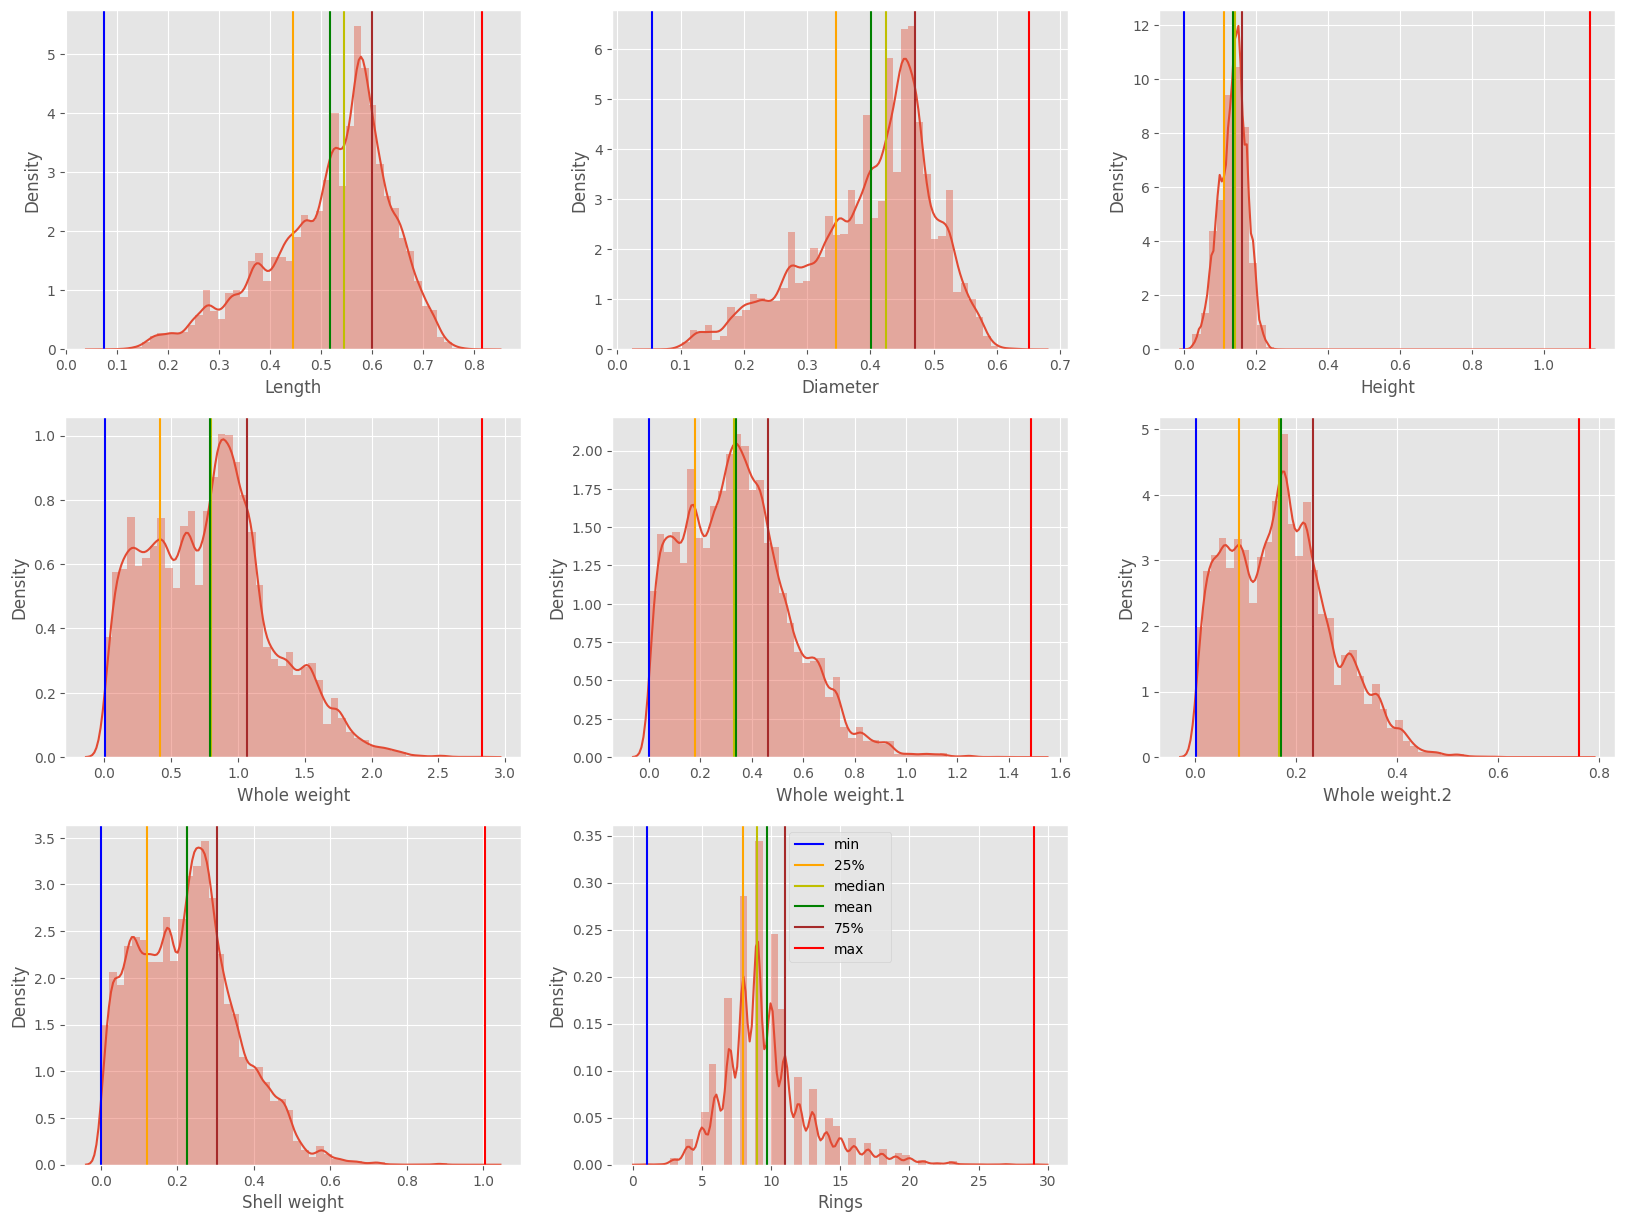

In [16]:
eda.exploration_num(train)

⦿ Most of the numeric columns exhibit a skewed distribution towards the right

⦿ Features like Length, Diameter weight, show heavily skewed distributions with long tails

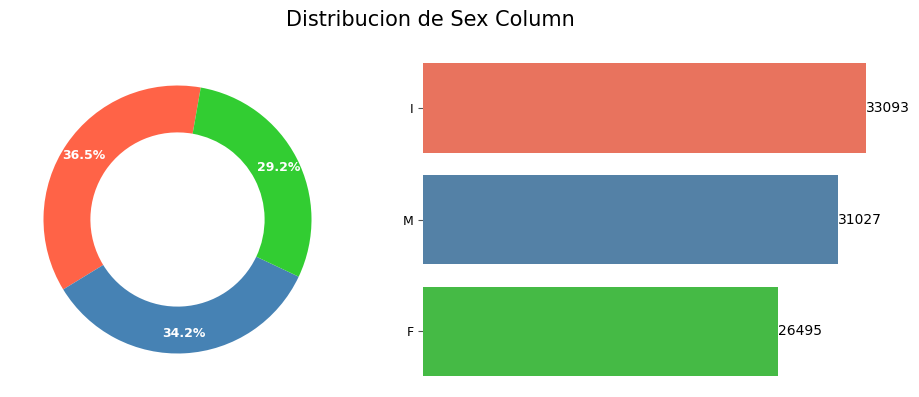

In [17]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()
value_counts = train['Sex'].value_counts()
labels = value_counts.index.tolist()
colors = ["#ff6347", "#4682b4", "#32cd32"]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)

# Count Plot
sns.countplot(data=train, y='Sex', ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Distribucion de Sex Column', fontsize=15)
plt.tight_layout()
plt.show()


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,26495.0,11.161389,3.021624,1.0,9.0,10.0,12.0,29.0
I,33093.0,7.533557,2.131495,1.0,6.0,7.0,8.0,29.0
M,31027.0,10.753408,2.980265,1.0,9.0,10.0,12.0,29.0


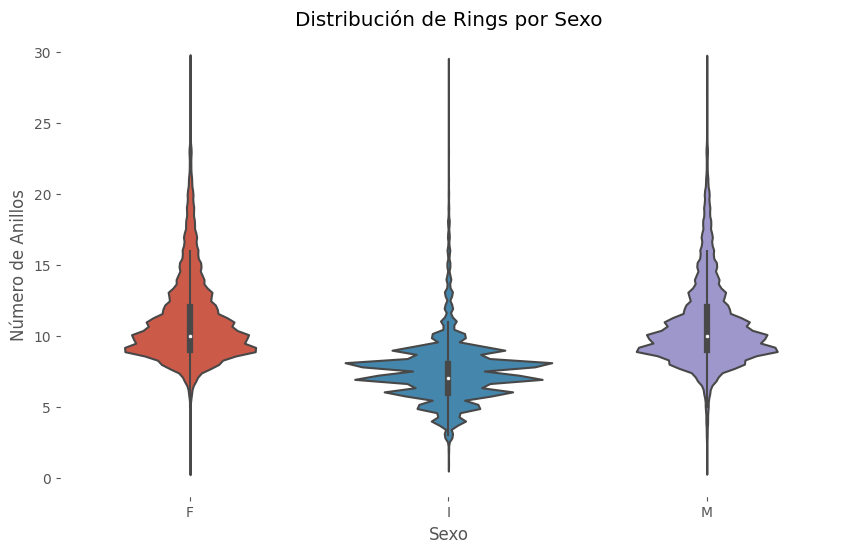

In [18]:
summary = train.groupby('Sex')['Rings'].describe()
display(summary)

# Crear el diagrama de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Rings', data=train)

# Añadir títulos y etiquetas
plt.title('Distribución de Rings por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Anillos')

# Mostrar el gráfico
plt.show()

⦿ The avg Rings varies among the categories, with females having the highest mean Rings aprx. 11.16 , followed by males at aprx. 10.75, and infants at aprx. 7.53 .

⦿ The Rings range spans from a minimum of 1 to a maximum of 29 across all sex categories.

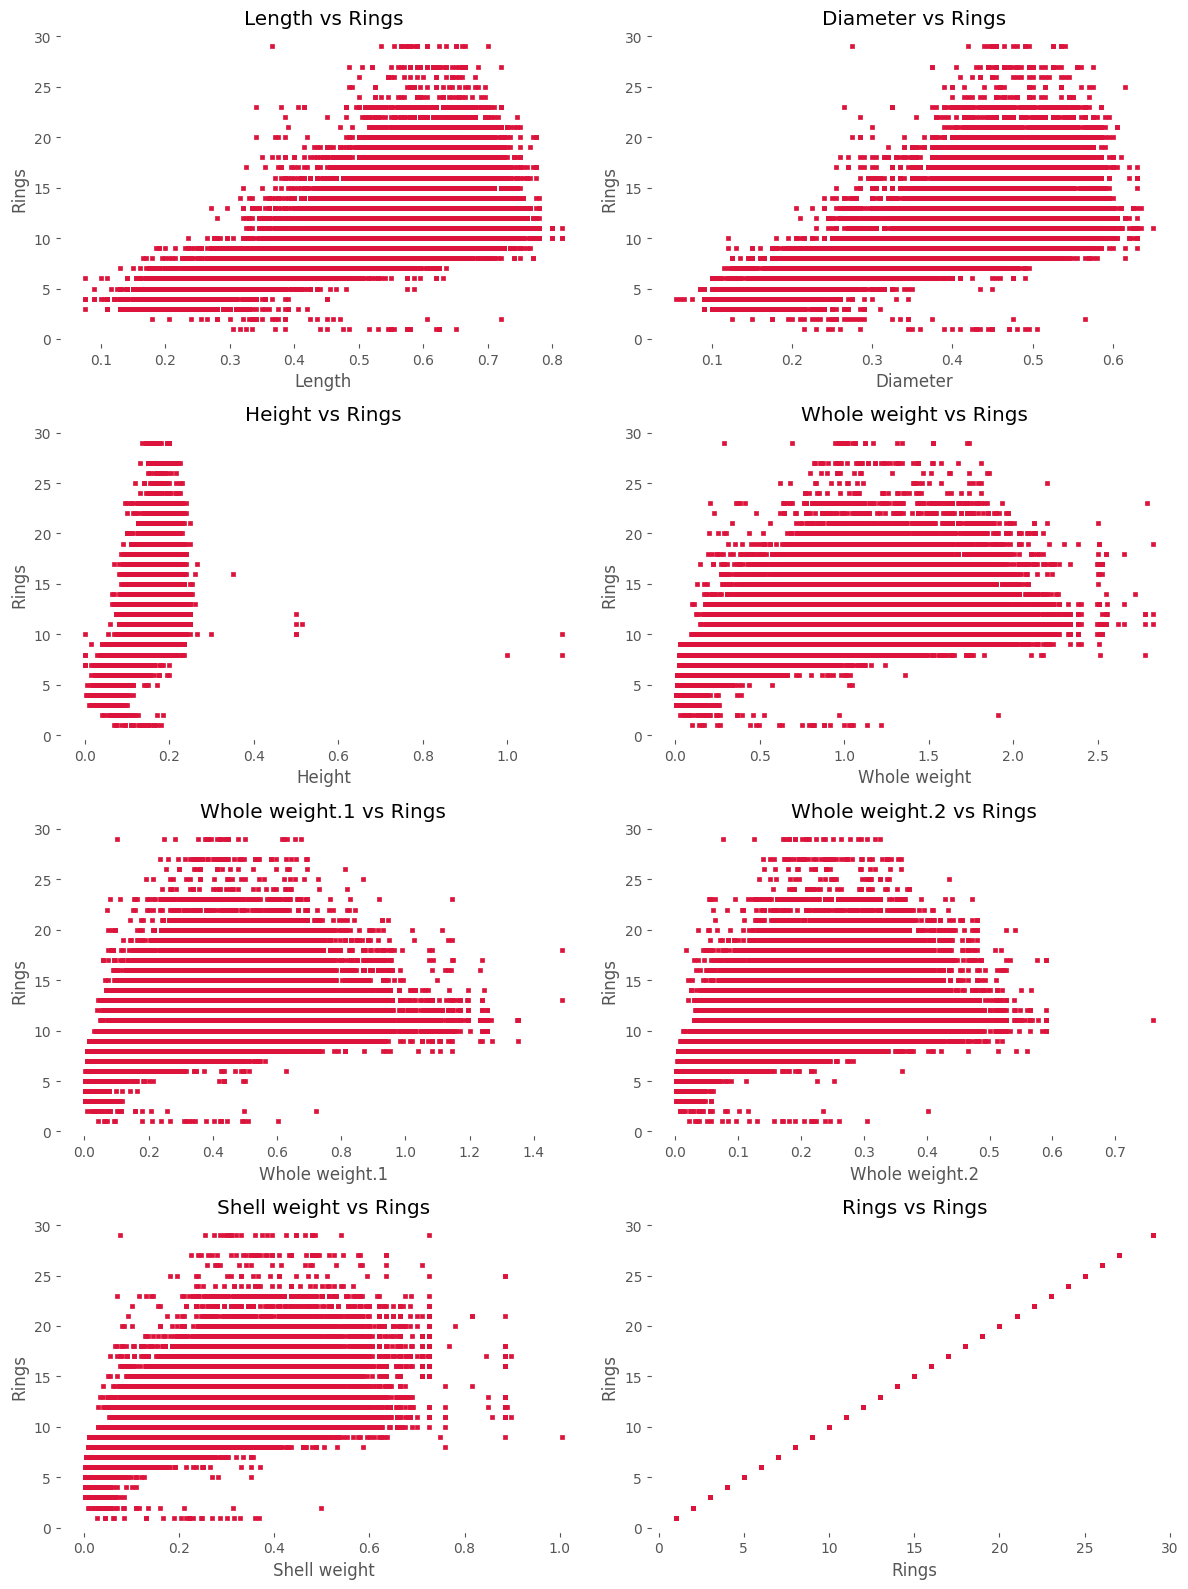

In [19]:
numeric_columns = train.select_dtypes(include=['float64', 'int64'])
eda.scarplot_strongs_vars(train,'Rings', numeric_columns)

# Correlation HeatMap

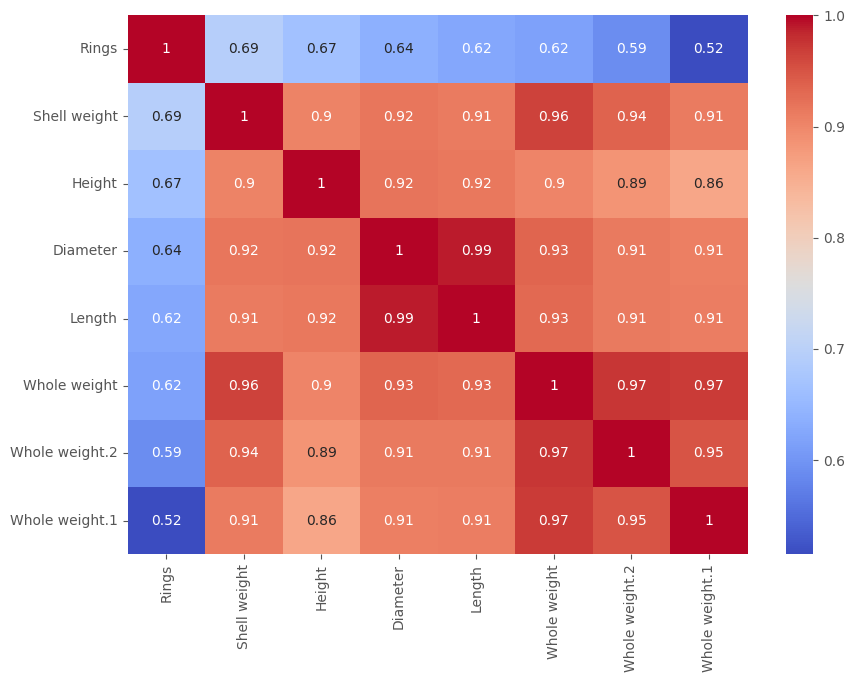

In [20]:
corr = eda.plot_high_corr_heatmap(train, 'Rings')

⦿ Train dataset show consistent correlation patterns among numerical features, with strong positive correlations observed between variables like Length, Diameter, Height, and Whole Weight.

<!-- el conjunto de datos de entrenamiento muestran patrones de correlación consistentes entre las características numéricas, con fuertes correlaciones positivas observadas entre variables como Longitud, Diámetro, Altura y Peso Total.-->

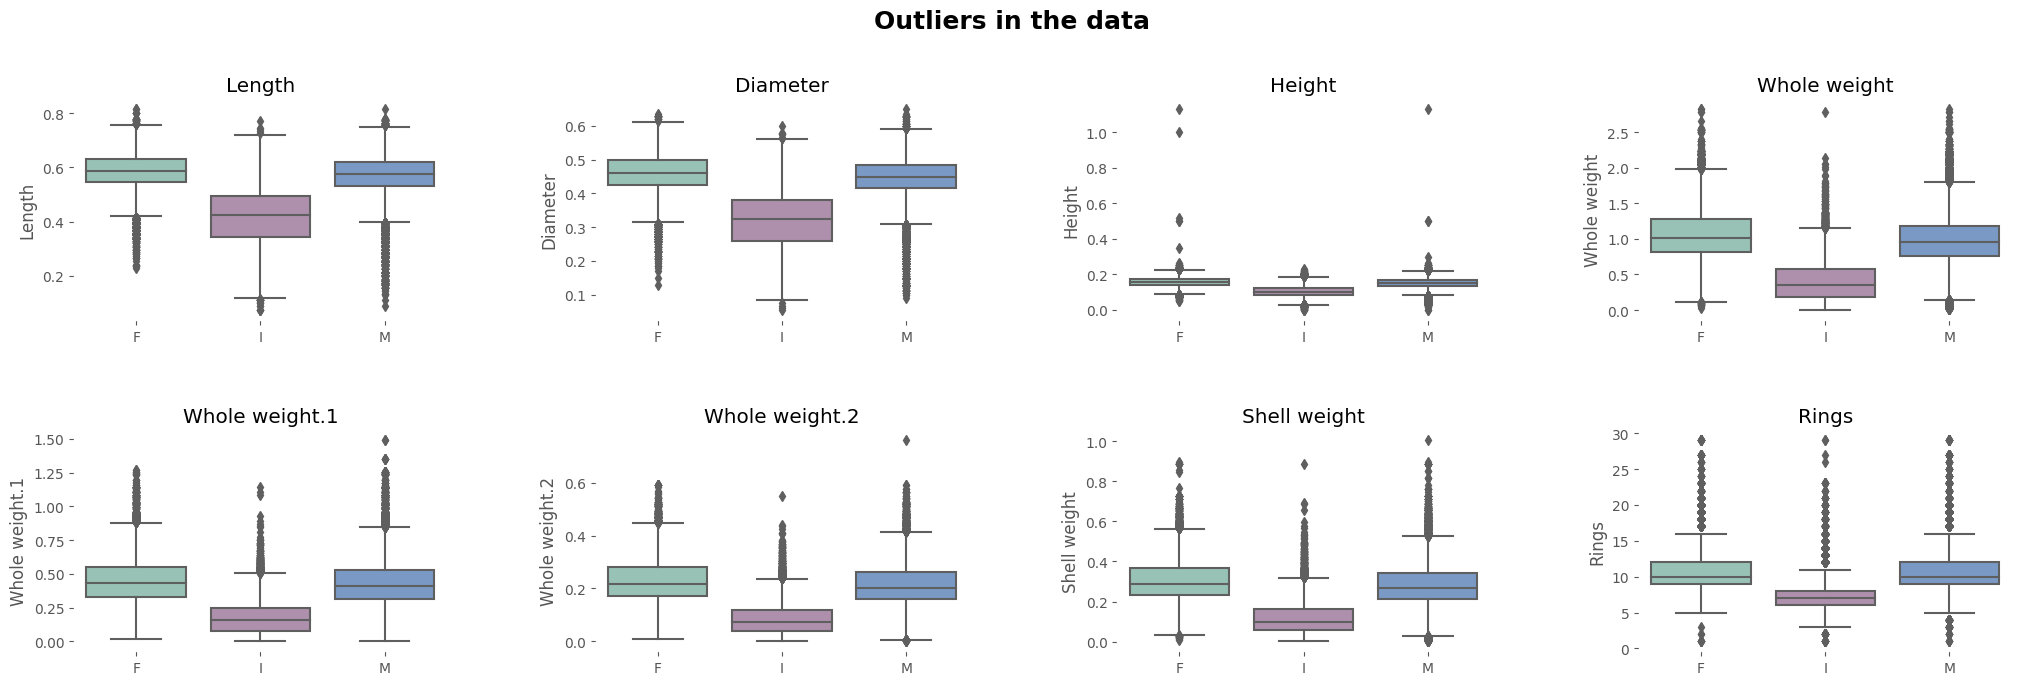

In [21]:
train['Sex'] = train['Sex'].astype('category')
custom_palette = {'F': '#91c9b9', 'M': '#6d98d1', 'I': '#b38bb2'}
# Check for presence of outliers in each feature
fig = plt.figure(figsize=[25,15])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(4,4, i+1)
    sns.boxplot(data=train, y=col, x='Sex', palette=custom_palette, ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('')
    ax.grid(False)
plt.show()

⦿ Presence of outliers can be seen across all features


# target variable distribution

In [22]:
#concact both train & original datasets
y = train.pop("Rings")
full = pd.concat([train,test], axis = 0)
full

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...
60406,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


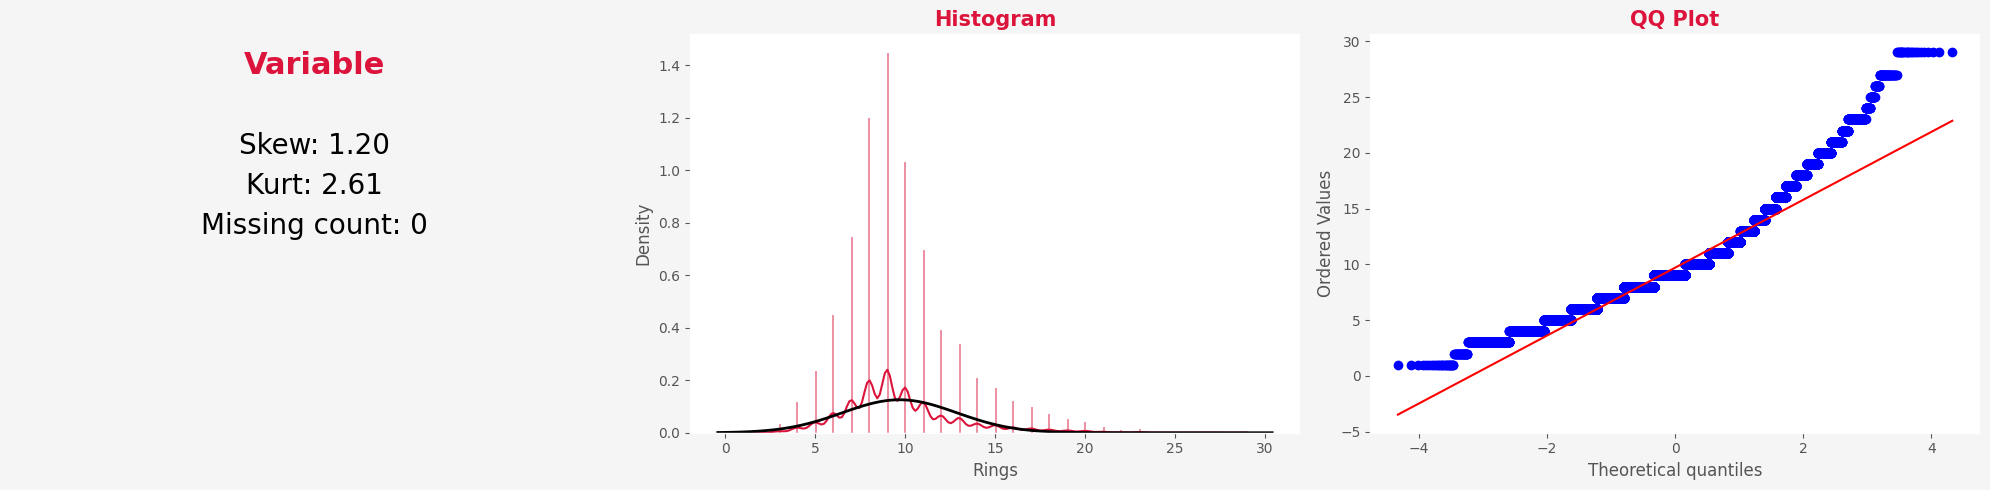

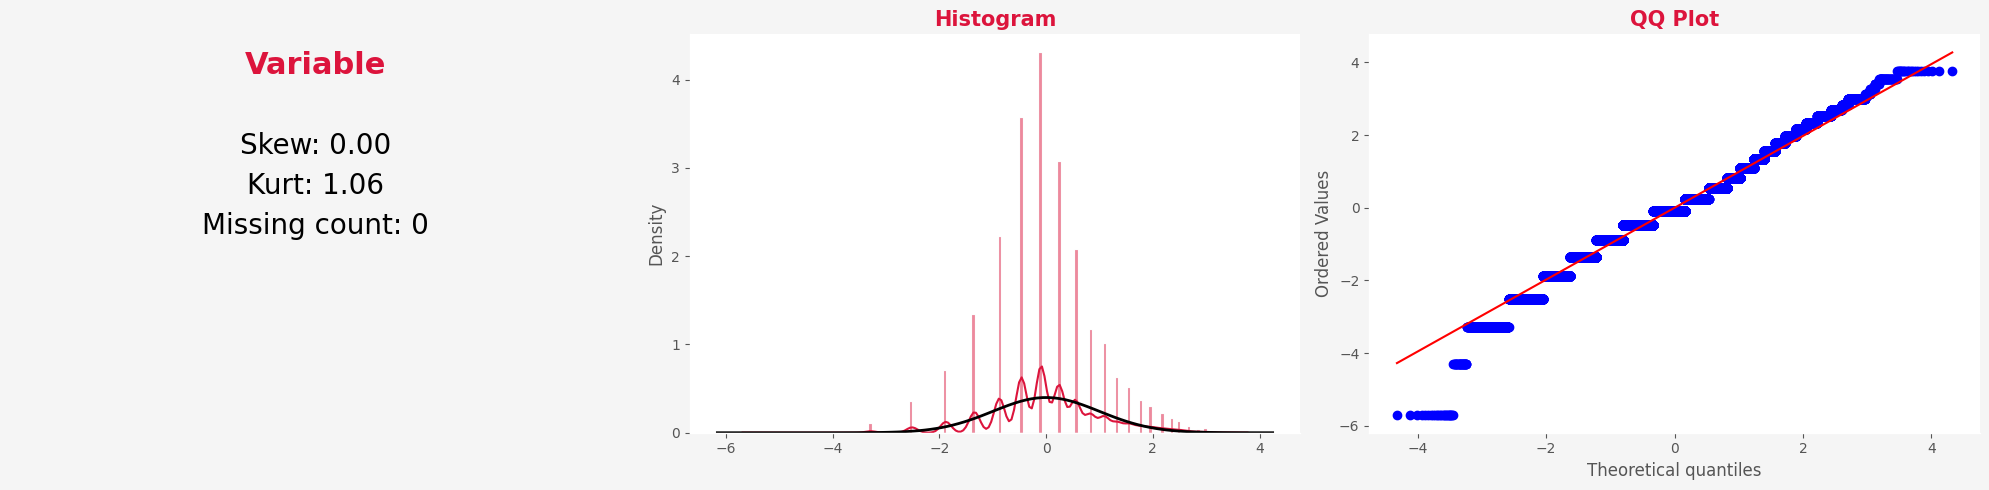

In [23]:
eda.plot_variable_distribution(y)
eda.plot_variable_distribution(y,use_yeo_johnson=True)

# Modelling

## TabTransformer Model for Abalone Age Prediction

The TabTransformer model adapts the Transformer architecture specifically for handling tabular data. It incorporates a unique structure that includes a class token (CLS) and positional embeddings, enhancing its ability to discern the intricate relationships between tabular features.

In [2]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler
import optuna
from joblib import dump, load
from optuna.samplers import TPESampler

In [ ]:
# 'Re'- Load the training and test data
train_data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

def preprocess_data(data, scaler=None, is_train=True):
    """
    Preprocess the input data.
    
    Args:
        data (pandas.DataFrame): Input data DataFrame.
        scaler (sklearn.preprocessing.MinMaxScaler, optional): Scaler object for feature scaling. Defaults to None.
        is_train (bool, optional): Indicates whether the data is training data or test data. Defaults to True.
        
    Returns:
        tuple: Preprocessed data, scaler (for training data), and log-transformed target variable (for training data).
    """
    # Convert 'Sex' column to numerical values
    data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
    
    if is_train:
        # Split features and target for training data
        X = data.drop(['id', 'Rings'], axis=1)
        y = data['Rings'].values
        
        # Scale the features using MinMaxScaler
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Apply log transformation to the target variable
        return X_scaled, np.log1p(y), scaler
    else:
        # Preprocess test data using the fitted scaler
        X = data.drop(['id'], axis=1)
        X_scaled = scaler.transform(X)
        return X_scaled

# Preprocess the training and test data
train_X, train_y, scaler = preprocess_data(train_data)
test_X = preprocess_data(test_data, scaler=scaler, is_train=False)

class FTTransformerModel(nn.Module):
    """
    FT-Transformer model for regression.
    """
    def __init__(self, input_dim, hidden_dim, num_layers, num_heads, dropout):
        """
        Initialize the FT-Transformer model.
        
        Args:
            input_dim (int): Number of input features.
            hidden_dim (int): Hidden dimension of the transformer.
            num_layers (int): Number of transformer encoder layers.
            num_heads (int): Number of attention heads.
            dropout (float): Dropout probability.
        """
        super(FTTransformerModel, self).__init__()
        # Capa de embedding: convierte las características de entrada en un espacio oculto
        self.embedding = nn.Linear(input_dim, hidden_dim)
        # Transformer Encoder: usa múltiples capas de atención multi-cabeza
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(hidden_dim, num_heads, dim_feedforward=hidden_dim*4, dropout=dropout), 
            num_layers)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        """
        Perform forward pass through the FT-Transformer model.
        
        Args:
            x (torch.Tensor): Input tensor.
            
        Returns:
            torch.Tensor: Model output.
        """
        x = self.embedding(x)
        x = self.transformer_encoder(x.unsqueeze(1)).squeeze(1)
        x = self.fc(x)
        return x

class AbaloneDataset(Dataset):
    """
    Custom dataset class for abalone data.
    """
    def __init__(self, X, y=None):
        """
        Initialize the AbaloneDataset.
        
        Args:
            X (numpy.ndarray): Input features.
            y (numpy.ndarray, optional): Target variable. Defaults to None.
        """
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32) if y is not None else None
    
    def __len__(self):
        """
        Return the length of the dataset.
        
        Returns:
            int: Length of the dataset.
        """
        return len(self.X)
    
    def __getitem__(self, idx):
        """
        Get an item from the dataset.
        
        Args:
            idx (int): Index of the item.
            
        Returns:
            tuple: Input features and target variable (if available) for the given index.
        """
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]

def train_model(params):
    """
    Train the FT-Transformer model with the given hyperparameters.
    
    Args:
        params (dict): Hyperparameters for the model.
        
    Returns:
        float: Average validation RMSE across folds.
    """
    # Unpack the hyperparameters
    input_dim = train_X.shape[1]
    hidden_dim = params['hidden_dim']
    num_layers = params['num_layers']
    num_heads = params['num_heads']
    dropout = params['dropout']
    num_epochs = params['num_epochs']
    batch_size = params['batch_size']
    learning_rate = params['learning_rate']
    early_stopping_patience = params['early_stopping_patience']
    
    # Set the device (GPU if available, else CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Create the FT-Transformer model
    model = FTTransformerModel(input_dim, hidden_dim, num_layers, num_heads, dropout).to(device)
    
    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Create KFold cross-validator
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    best_val_rmse_folds = []
    
    # Perform k-fold cross-validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(train_X)):
        print(f"Fold [{fold+1}/3]")
        
        # Create train and validation datasets
        train_dataset = AbaloneDataset(train_X[train_idx], train_y[train_idx])
        val_dataset = AbaloneDataset(train_X[val_idx], train_y[val_idx])
        
        # Create data loaders for train and validation datasets
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)
        
        # Initialize variables for early stopping
        best_val_rmse = float('inf')
        best_model_state = None
        patience_counter = 0
        
        # Training loop
        for epoch in tqdm(range(num_epochs)):
            model.train()
            
            # Iterate over the training batches
            for batch_X, batch_y in train_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                
                # Forward pass
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs.squeeze(), batch_y)
                
                # Backward pass and optimization
                loss.backward()
                optimizer.step()
            
            model.eval()
            val_predictions = []
            val_targets = []
            
            # Iterate over the validation batches
            with torch.no_grad():
                for batch_X, batch_y in val_loader:
                    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                    outputs = model(batch_X)
                    val_predictions.append(outputs.squeeze().cpu().numpy())
                    val_targets.append(batch_y.cpu().numpy())
            
            # Concatenate the validation predictions and targets
            val_predictions = np.concatenate(val_predictions)
            val_targets = np.concatenate(val_targets)
            
            # Calculate validation RMSE
            val_rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))
            print(f"Epoch [{epoch+1}/{num_epochs}], Validation RMSE: {val_rmse:.4f}")
            
            # Check for early stopping
            if val_rmse < best_val_rmse:
                best_val_rmse = val_rmse
                best_model_state = model.state_dict()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break
        
        # Store the best validation RMSE for the current fold
        best_val_rmse_folds.append(best_val_rmse)
        
        # Load the best model state for the current fold
        model.load_state_dict(best_model_state)
    
    # Calculate the average validation RMSE across all folds
    avg_val_rmse = np.mean(best_val_rmse_folds)
    print(f"Average Validation RMSE across folds: {avg_val_rmse:.4f}")
    
    return avg_val_rmse

def objective(trial):
    """
    Objective function for hyperparameter optimization.
    
    Args:
        trial (optuna.trial.Trial): Optuna trial object.
        
    Returns:
        float: Average validation RMSE.
    """
    hidden_dim = trial.suggest_int('hidden_dim', 64, 256, step=16)
    num_heads = trial.suggest_int('num_heads', 2, hidden_dim // 16)
    
    while hidden_dim % num_heads != 0:
        num_heads -= 1
    
    params = {
        'hidden_dim': hidden_dim,
        'num_layers': trial.suggest_int('num_layers', 1, 4),
        'num_heads': num_heads,
        'dropout': trial.suggest_float('dropout', 0.1, 0.5),
        'num_epochs': 200,
        'batch_size': trial.suggest_int('batch_size', 16, 128),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True),
        'early_stopping_patience': 10
    }
    
    avg_val_rmse = train_model(params)
    
    return avg_val_rmse

# Create an Optuna study
study = optuna.create_study(direction='minimize', sampler=TPESampler(multivariate=True))

# # Optimize the hyperparameters
study.optimize(objective, timeout=3600 * 10)

# # Print the best hyperparameters and validation RMSE
print("Best hyperparameters:", study.best_params)
print("Best validation RMSE:", study.best_value)

# # Save the best hyperparameters to a file
dump(study.best_params, 'ft_params.joblib')